# OpenBCIデータのストリーミング
1. `pip install brainflow`
2. Cytonボードの電源を入れ、USBドングルを挿す。すでにGUIを使っている場合はストリームを止めておく。
3. パラメータの `params.serial_port` を自分の環境に合わせ（GUIで確認できる）、1つ目のセルを実行。
4. 最大秒数 `T` を指定し（要らなくなった？）、`start_stream()` でストリーム開始。
5. `get_board_data()` でデータが2次元配列で取得される。めでたしめでたし。
6. 取得後はストリームを停止しておくことも忘れずに。

[元のサンプルコード](https://brainflow.readthedocs.io/en/stable/Examples.html#python)

In [5]:
# 準備
from brainflow.board_shim import BoardShim, BrainFlowInputParams
BoardShim.enable_dev_board_logger()

# パラメータ
params = BrainFlowInputParams()
params.serial_port = "COM4" # ここだけ環境に合わせればおｋ
board = BoardShim(0, params)

# セッション開始
board.prepare_session()

# ThinkPulse電極の場合，各チャンネルのゲインを6xに変更
for ch in range(1, 9):
    board.config_board(f"x{ch}030110X")

In [7]:
# start_stream() の引数に取得するデータの最大サンプル数を指定してストリーム開始（引数無くても良くなったっぽい？）。
# 8chなら250Hzなので、最大40秒取りたければT=40として250T=10000時刻。
T = 40
board.start_stream(250*T)

# T秒経ったらデータをまとめて取得する。T秒経っていなければその時刻まで。実行するとストリームは再度時刻0から開始する。
import time
time.sleep(T)
data = board.get_board_data()

In [12]:
# ストリームを停止してセッション解放。これをしないとGUIが使えない。
board.stop_stream()
board.release_session()

# データの確認

In [13]:
# 2次元配列になっている。
data

array([[ 1.09000000e+02,  1.10000000e+02,  1.11000000e+02, ...,
         1.21000000e+02,  1.22000000e+02,  1.23000000e+02],
       [-1.43534543e+05, -1.39294194e+05, -1.41732255e+05, ...,
        -1.45110028e+05, -1.46131995e+05, -1.45394968e+05],
       [-1.38413915e+05, -1.35240034e+05, -1.36782908e+05, ...,
        -1.41765358e+05, -1.45531538e+05, -1.41158799e+05],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.65416274e+09,  1.65416274e+09,  1.65416274e+09, ...,
         1.65416278e+09,  1.65416278e+09,  1.65416278e+09],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [11]:
# 24行×時刻数。24行は 時刻, 1-8ch, 加速度xyz, ... という感じ。
# バージョンにより仕様が変わるのでCSVファイルを確認するのが確実。
data.shape

(24, 9999)

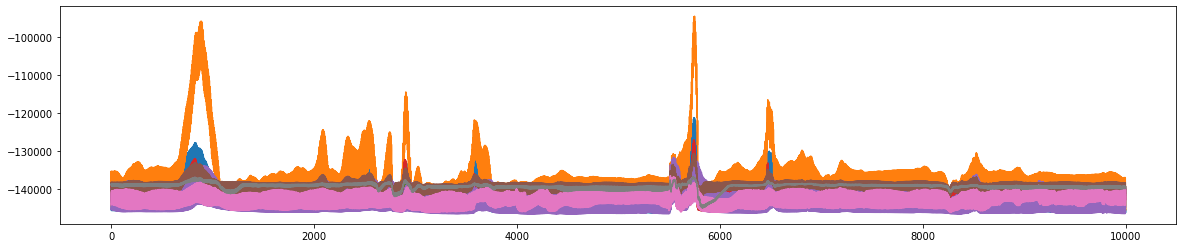

In [32]:
# 波形のプロット。8chのデータはdata[1:9]。
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 4))
plt.plot(data[1:9].T)
plt.show()

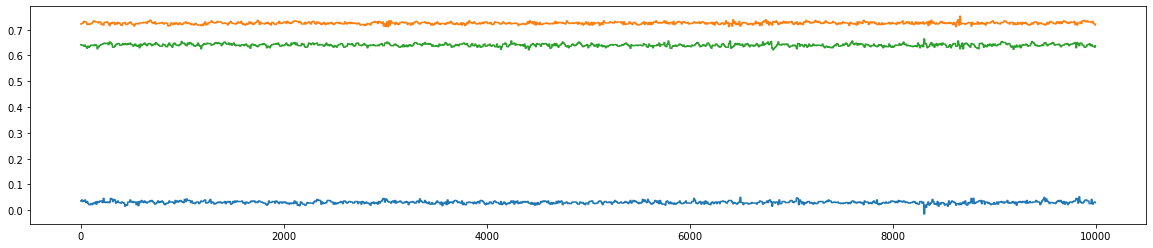

In [34]:
# 加速度はこんな感じ。
plt.figure(figsize=(20, 4))
plt.plot(data[9:12].T)
plt.show()